<a href="https://colab.research.google.com/github/GaneshKGowda25/House_price_prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#"House Price Prediction" using Linear Regression (Using SKLearn)

#Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Importing the dataset

In [2]:
from google.colab import files
upload=files.upload()

Saving Housing.csv to Housing.csv


#Analyzing and Visualizing the dataset

In [3]:
df=pd.read_csv("Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
print("Nan values: \n",df.isna().sum())

Nan values: 
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Text(0, 0.5, 'parking')

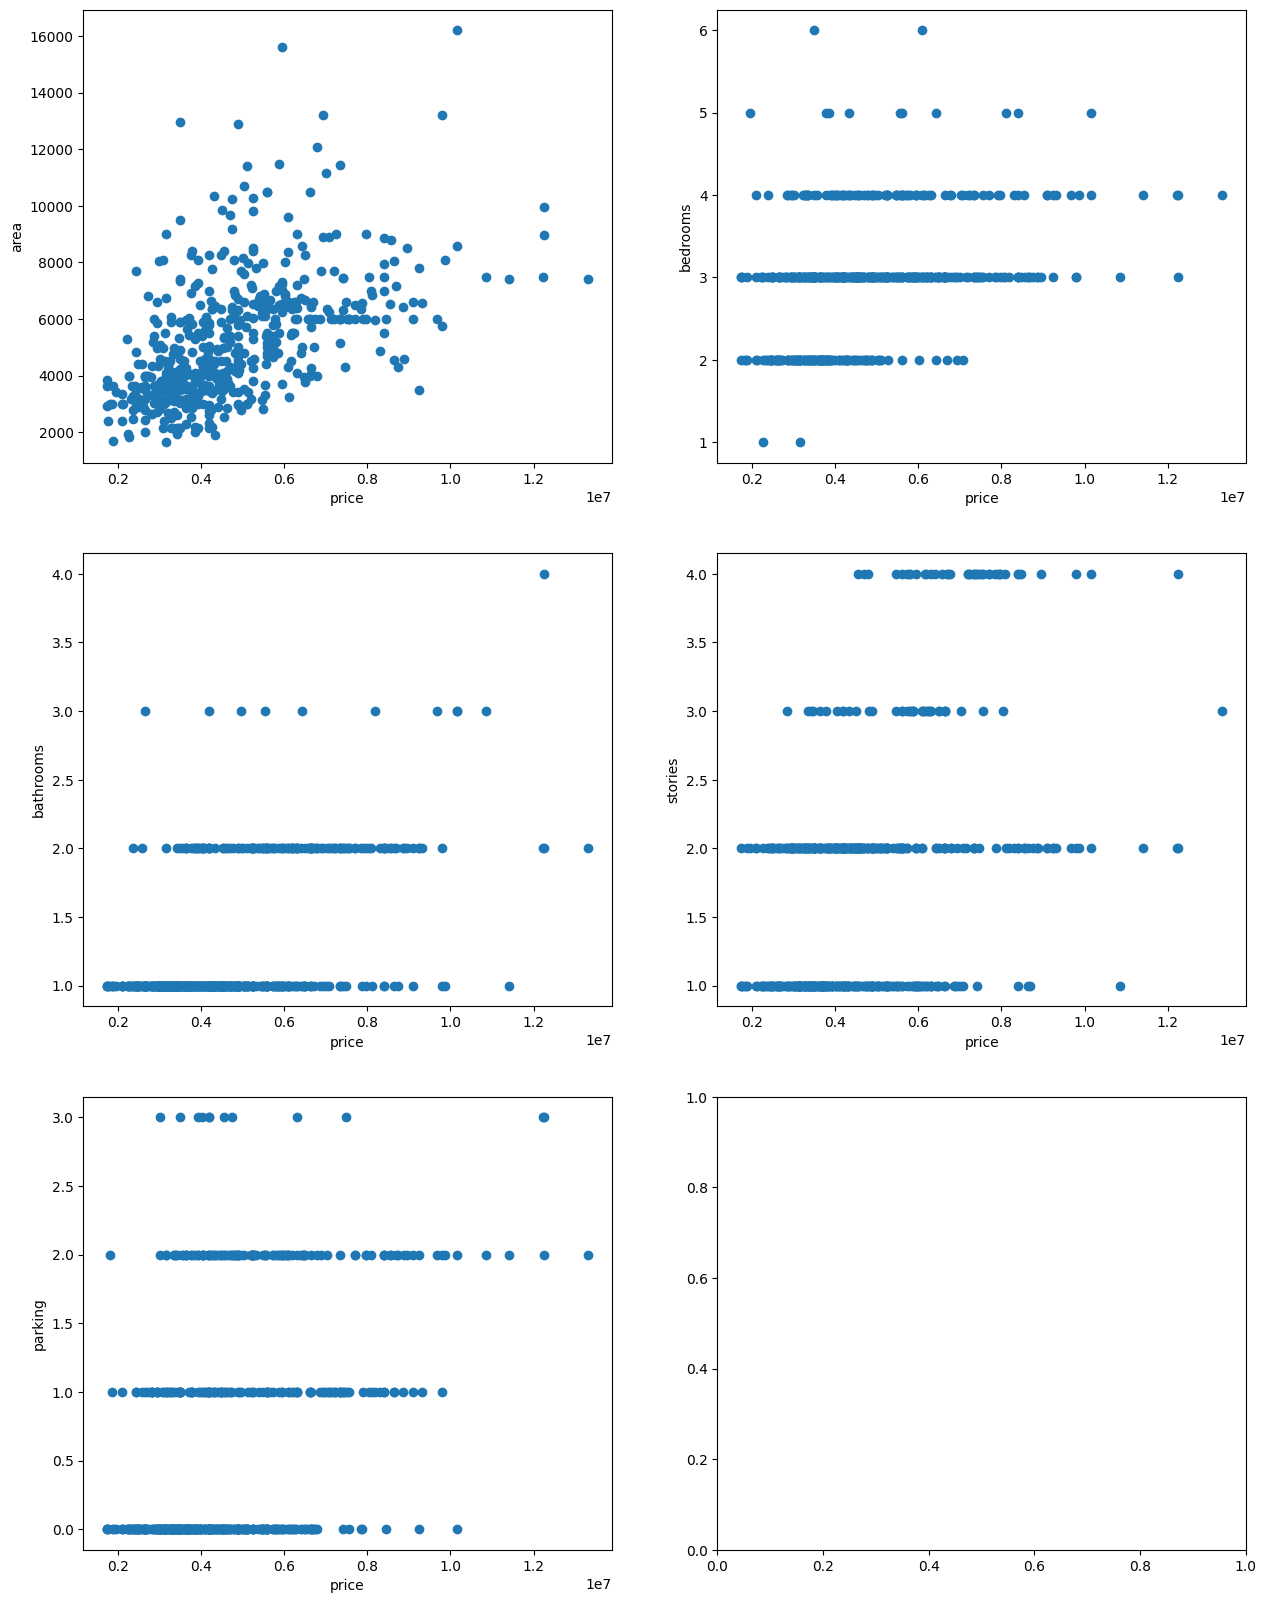

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

ax[0, 0].scatter(df.price, df.area)
ax[0, 0].set_xlabel('price')
ax[0, 0].set_ylabel('area')

ax[0, 1].scatter(df.price, df.bedrooms)
ax[0, 1].set_xlabel('price')
ax[0, 1].set_ylabel('bedrooms')

ax[1, 0].scatter(df.price, df.bathrooms)
ax[1, 0].set_xlabel('price')
ax[1, 0].set_ylabel('bathrooms')

ax[1, 1].scatter(df.price, df.stories)
ax[1, 1].set_xlabel('price')
ax[1, 1].set_ylabel('stories')

ax[2, 0].scatter(df.price, df.parking)
ax[2, 0].set_xlabel('price')
ax[2, 0].set_ylabel('parking')

#Removing some of the outliers from dataset

In [6]:
df_no_outliers= df.copy()
num_cols=df_no_outliers.select_dtypes(include=("int64",'float64')).columns.tolist()

for col in num_cols:
    Q1=df_no_outliers[col].quantile(0.05)
    Q3=df_no_outliers[col].quantile(0.95)
    IQR= Q3-Q1
    lower_bound= Q1-(1.5*IQR)
    upper_bound= Q3+(1.5*IQR)
    df_no_outliers=df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

df_no_outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#Seperating features and labels

In [7]:
X=df_no_outliers.drop(columns=['price'])
y=df_no_outliers.price

#Cheking for skewness

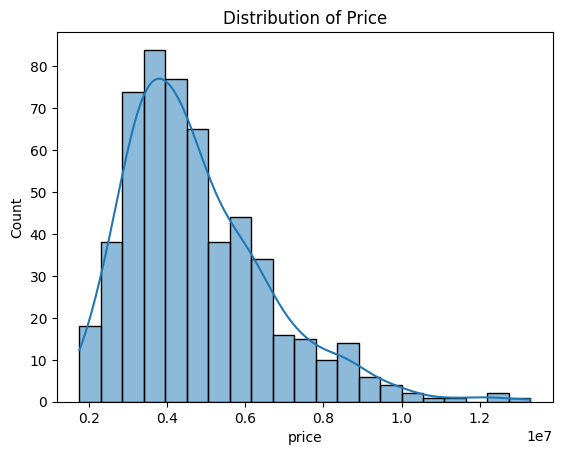

Skewness of price: 1.2122388370279802


In [8]:

sns.histplot(df_no_outliers.price, kde=True)
plt.title("Distribution of Price")
plt.show()
print("Skewness of price:", df.price.skew())


#Splitting the dataset and applying log to reduce skewness

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
y_train_transformed= np.log1p(y_train)

#Seperating numeric and categorical columns from X_train

In [10]:
numeric_cols= X_train.select_dtypes(include=('int64','float64','int32')).columns.tolist()
categorical_cols=X_train.select_dtypes(include=('object','category')).columns.tolist()


#Data transformoation and model building

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer= Pipeline([
    ('scaler',StandardScaler())])
categorical_transformer= Pipeline([
    ('encoder',OneHotEncoder())])

preprocessor=ColumnTransformer(transformers=[('Numeric',numeric_transformer,numeric_cols),
                                            ('category',categorical_transformer,categorical_cols)])

In [12]:
from sklearn.linear_model import LinearRegression

model= Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())])
model.fit(X_train,y_train_transformed)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('category',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [13]:
# Bias (intercept)
bias = model.named_steps['regressor'].intercept_

# Weights (coefficients)
weights = model.named_steps['regressor'].coef_

print("Bias (Intercept):", bias)
print("Weights (Coefficients):", weights)

Bias (Intercept): 15.43187582875418
Weights (Coefficients): [ 0.09768415  0.02291896  0.08429662  0.07249374  0.03338194 -0.05098898
  0.05098898 -0.03335358  0.03335358 -0.04370472  0.04370472 -0.06114194
  0.06114194 -0.07984933  0.07984933 -0.06137915  0.06137915  0.03291305
  0.03986771 -0.07278076]


#Prediction

In [15]:
y_pred_transformed=model.predict(X_test)
y_pred=np.expm1(y_pred_transformed)
y_pred

array([ 3308379.8690773 ,  3884838.97734116,  3667892.42661923,
        3089786.20128592,  2919481.90907251,  6168898.23974293,
        4416718.44680161,  7131390.1630326 ,  6849990.94475521,
        5469051.4177195 ,  8849853.75295251,  4186822.90838895,
        4254781.02995714,  7035961.06123547,  3631062.06276752,
        3073958.97384196,  3396969.99130996,  7003817.7533775 ,
        4316760.93932581,  2876696.8723453 ,  6217004.65513274,
        3369848.07908849,  4218401.48499584,  4810766.56720438,
        6140121.75176876,  8688559.55035171,  5521894.56334607,
        4495874.08009115,  8467873.95137388,  3876122.81285116,
        7104545.46384353,  3965107.22974586,  6585588.99669042,
        4036115.36582277,  3503270.08902571,  5500105.02842201,
        3070106.70003761,  4275520.44556398,  3979234.81130945,
        2961254.83479509,  4476514.94688264,  4031096.57502832,
        4990190.01168837,  4530747.73604889,  3027028.78885822,
        5906020.84760525,  5238068.45386

#Model evaluation and visualization

In [24]:
import numpy as np
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 780407.0010260898
RMSE: 1069842.098285821
R2: 0.7274227600286549


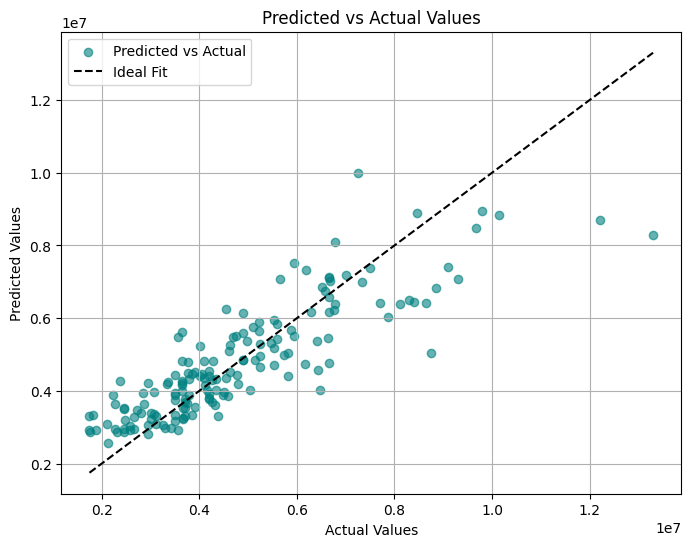

In [25]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal',label='Predicted vs Actual')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='black',
    linestyle='--',
    label='Ideal Fit'
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()



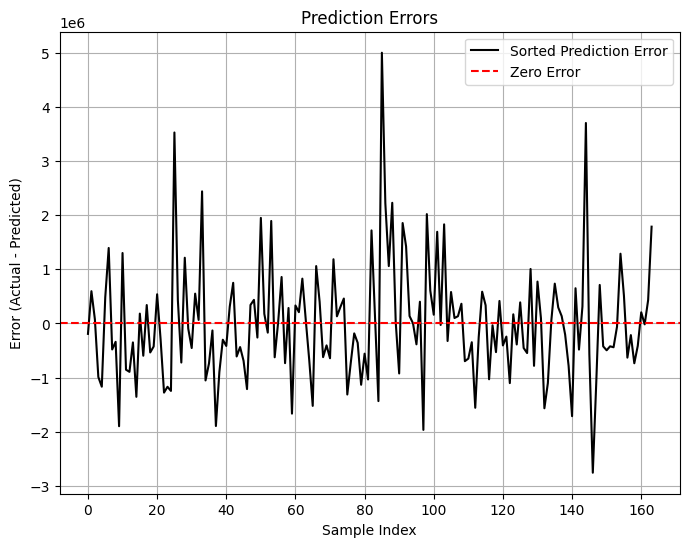

In [27]:


error = (y_test - y_pred)


plt.figure(figsize=(8, 6))
plt.plot(error, label='Sorted Prediction Error', color='black')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')

plt.xlabel("Sample Index")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Prediction Errors")
plt.legend()
plt.grid(True)
plt.show()


#Random Testing

In [28]:
def predict_from_input(model, preprocessor):
    area = float(input("Enter the area of the house: "))
    bedrooms = float(input("Enter the number of bedrooms: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    stories = float(input("Enter number of stories: "))
    near_mainroad = input("Is the house near to main road? (yes/no): ")
    guest_room = input("Are there any guest room? (yes/no): ")
    basement = input("Does it have Basement? (yes/no): ")
    hotwater = input("Water heating availabel? (yes/no): ")
    ac = input("AC available? (yes/no): ")
    parking = int(input("Number of parking spaces: "))
    prefarea = input("Do the house is in preferred area? (yes/no): ")
    furn_status = input("Furnishing status(furnished/unfurnished/semi-furnished): ")

    data_dict = {
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'stories': stories,
        'mainroad': near_mainroad,
        'guestroom': guest_room,
        'basement': basement,
        'hotwaterheating': hotwater,
        'airconditioning': ac,
        'parking': parking,
        'prefarea': prefarea,
        'furnishingstatus': furn_status
    }
    df = pd.DataFrame([data_dict])
    pred = model.predict(df)
    print("------------------------------------------------------------------------------")
    print("Expected House Price:", pred[0])
predict_from_input(model, preprocessor)

Enter the area of the house: 1500
Enter the number of bedrooms: 2
Enter the number of bathrooms: 2
Enter number of stories: 1
Is the house near to main road? (yes/no): yes
Are there any guest room? (yes/no): yes
Does it have Basement? (yes/no): yes
Water heating availabel? (yes/no): yes
AC available? (yes/no): yes
Number of parking spaces: 2
Do the house is in preferred area? (yes/no): yes
Furnishing status(furnished/unfurnished/semi-furnished): furnished
------------------------------------------------------------------------------
Expected House Price: 15.699479688881272
